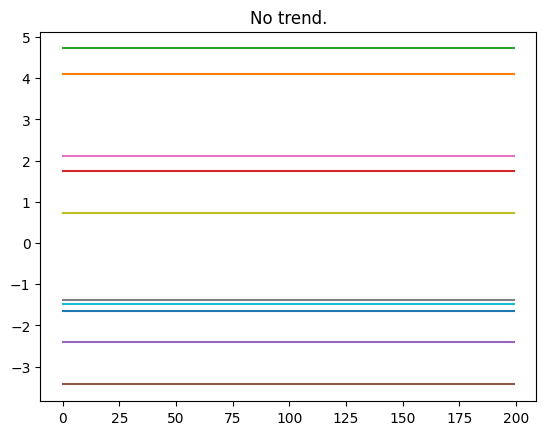

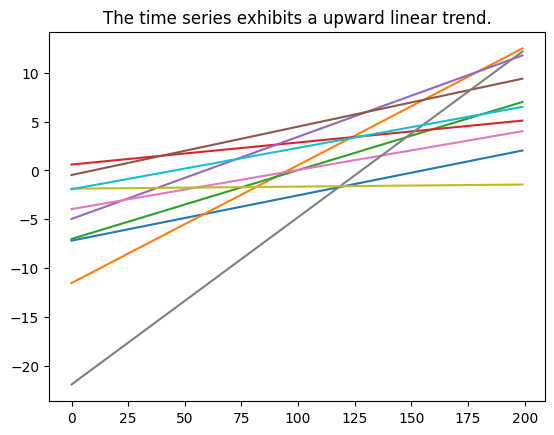

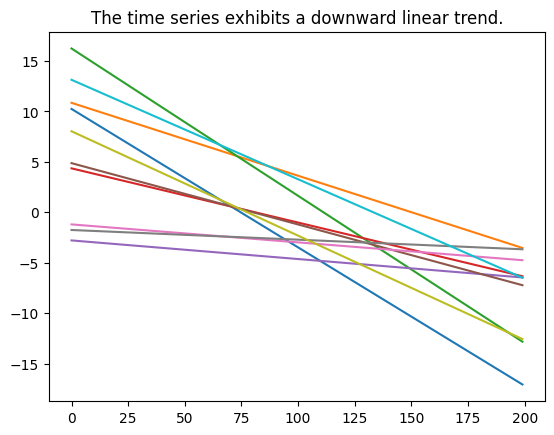

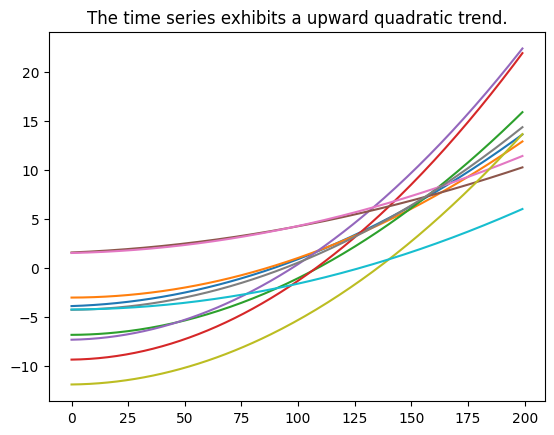

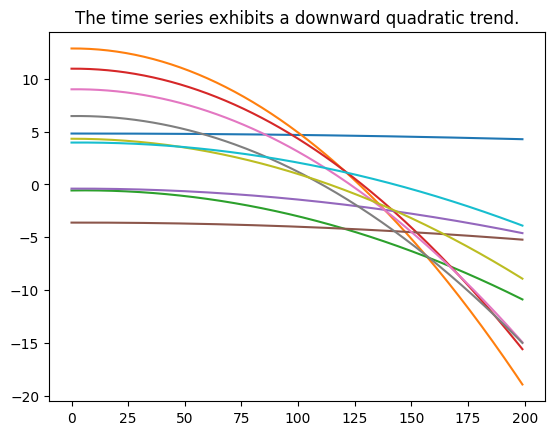

In [1]:
from trend import *
ts_ls, txt_ls = generate_trend_series(10, 200, trend_type='flat')
# plot the series list
for i in range(len(ts_ls)):
    plt.plot(ts_ls[i])
plt.title(txt_ls[i])
plt.show()

ts_ls, txt_ls = generate_trend_series(10, 200, trend_type='linear', direction='up')
# plot the series list
for i in range(len(ts_ls)):
    plt.plot(ts_ls[i])
plt.title(txt_ls[i])
plt.show()
ts_ls, txt_ls = generate_trend_series(10, 200, trend_type='linear', direction='down')
# plot the series list
for i in range(len(ts_ls)):
    plt.plot(ts_ls[i])
plt.title(txt_ls[i])
plt.show()


ts_ls, txt_ls = generate_trend_series(10, 200, trend_type='quadratic', direction='up')
# plot the series list
for i in range(len(ts_ls)):
    plt.plot(ts_ls[i])
plt.title(txt_ls[i])
plt.show()
ts_ls, txt_ls = generate_trend_series(10, 200, trend_type='quadratic', direction='down')
# plot the series list
for i in range(len(ts_ls)):
    plt.plot(ts_ls[i])
plt.title(txt_ls[i])
plt.show()

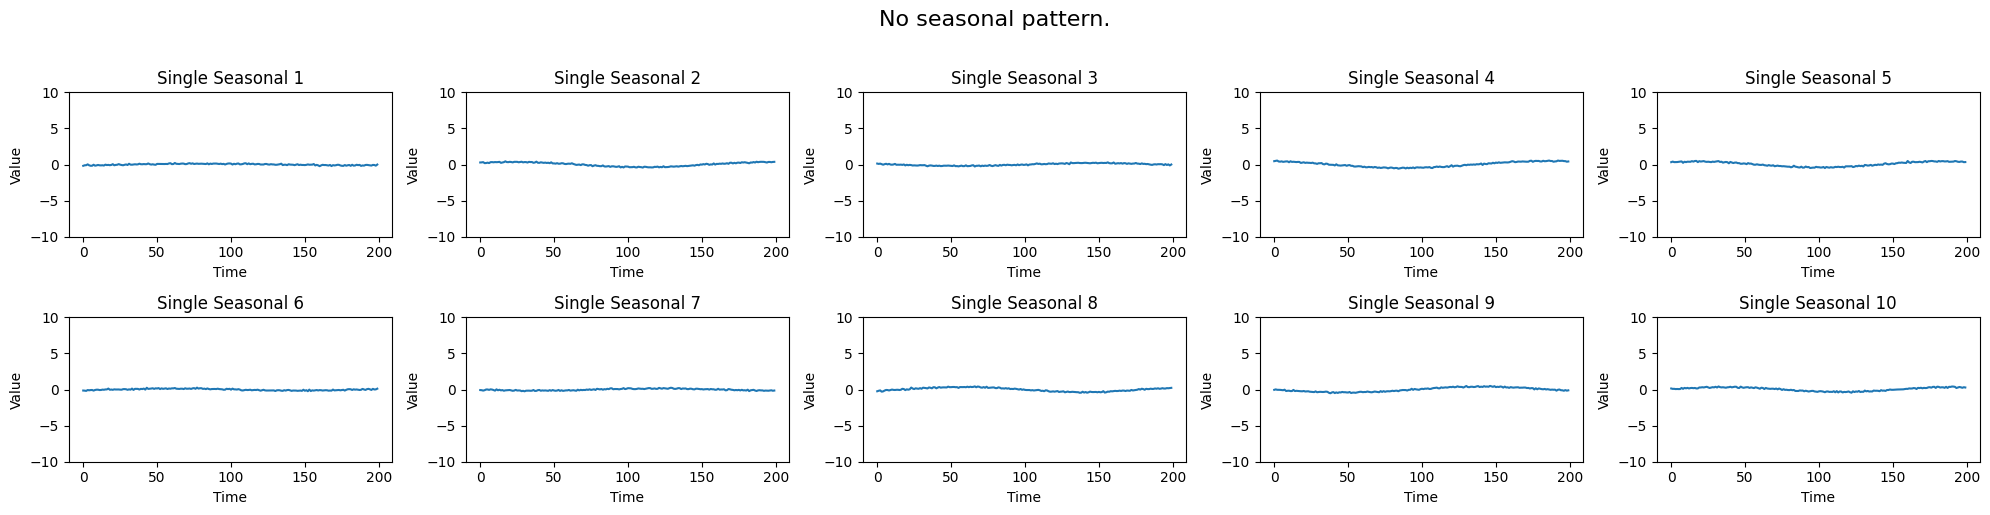

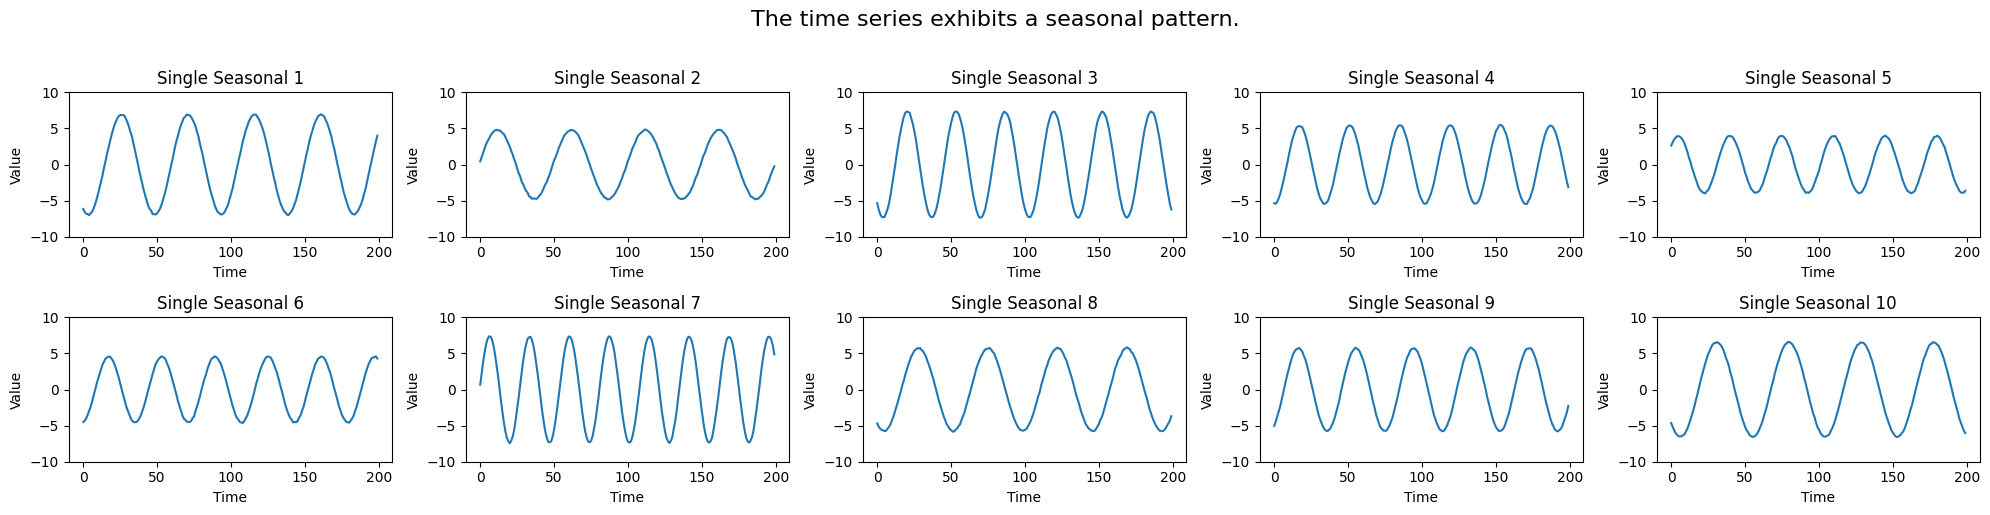

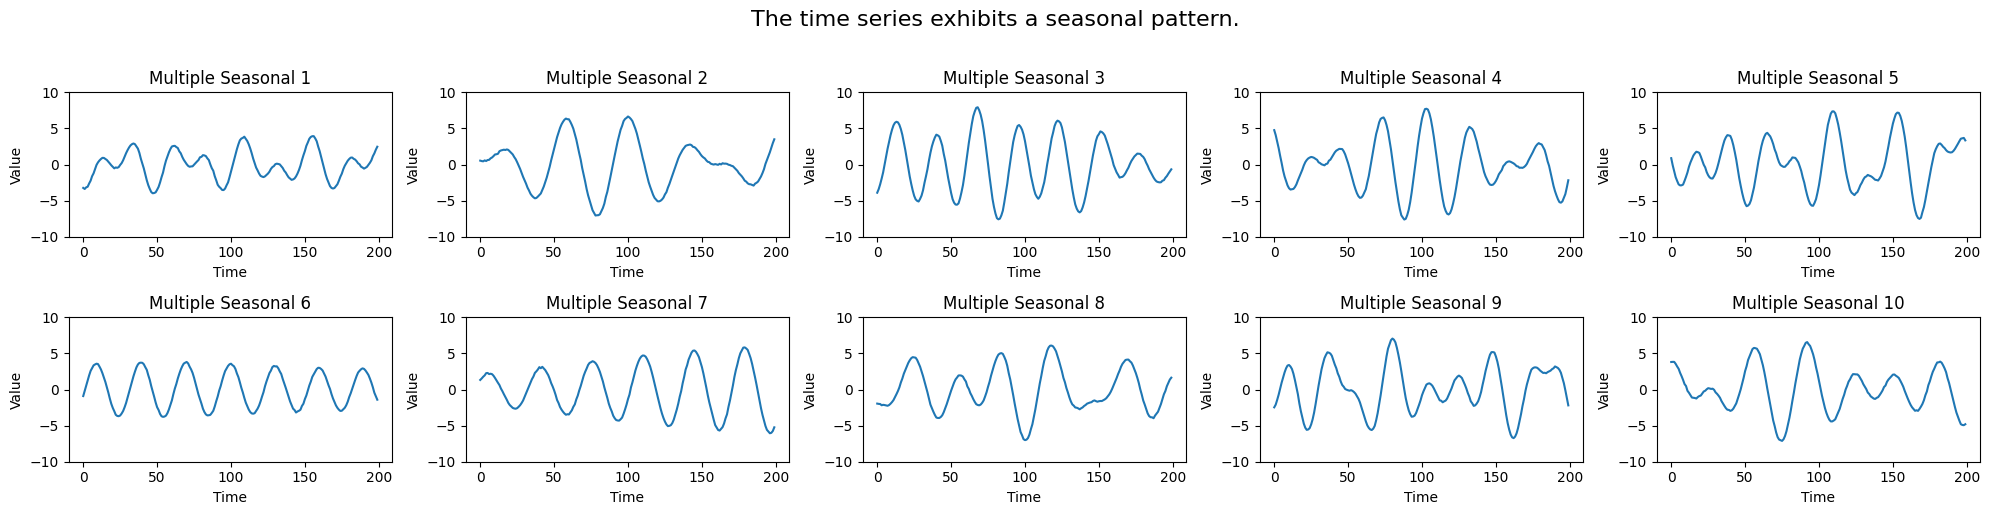

In [2]:
from seasonality import *
import matplotlib.pyplot as plt

# Generate example series for each seasonal type
n_series = 10  # Reduced number of series for better visualization
length = 200

# No seasonal pattern
no_series, no_descriptions = generate_seasonal_series(
    n_series, length, 'no')

# Single seasonal pattern
single_series, single_descriptions = generate_seasonal_series(
    n_series, length, 'single')

# Multiple seasonal patterns
multiple_series, multiple_descriptions = generate_seasonal_series(
    n_series, length, 'multiple')

# Create three separate figures for better visualization
# Figure 1: Single Seasonal Patterns
plt.figure(figsize=(20, 5))
plt.suptitle(no_descriptions[0], fontsize=16, y=1.02)

# Plot single seasonal patterns in a 2x5 grid
for i, (series, desc) in enumerate(zip(no_series, no_descriptions)):
    plt.subplot(2, 5, i+1)
    plt.plot(series)
    plt.title(f'Single Seasonal {i+1}')
    plt.xlabel('Time')
    plt.ylabel('Value')
    plt.ylim(-10, 10)
    plt.tight_layout()

plt.show()

# Figure 2: Single Seasonal Patterns
plt.figure(figsize=(20, 5))
plt.suptitle(single_descriptions[0], fontsize=16, y=1.02)

# Plot single seasonal patterns in a 2x5 grid
for i, (series, desc) in enumerate(zip(single_series, single_descriptions)):
    plt.subplot(2, 5, i+1)
    plt.plot(series)
    plt.title(f'Single Seasonal {i+1}')
    plt.xlabel('Time')
    plt.ylabel('Value')
    plt.ylim(-10, 10)
    plt.tight_layout()

plt.show()

# Figure 3: Multiple Seasonal Patterns
plt.figure(figsize=(20, 5))
plt.suptitle(multiple_descriptions[0], fontsize=16, y=1.02)

# Plot multiple seasonal patterns in a 2x5 grid
for i, (series, desc) in enumerate(zip(multiple_series, multiple_descriptions)):
    plt.subplot(2, 5, i+1)
    plt.plot(series)
    plt.title(f'Multiple Seasonal {i+1}')
    plt.xlabel('Time')
    plt.ylabel('Value')
    plt.ylim(-10, 10)
    plt.tight_layout()

plt.show()

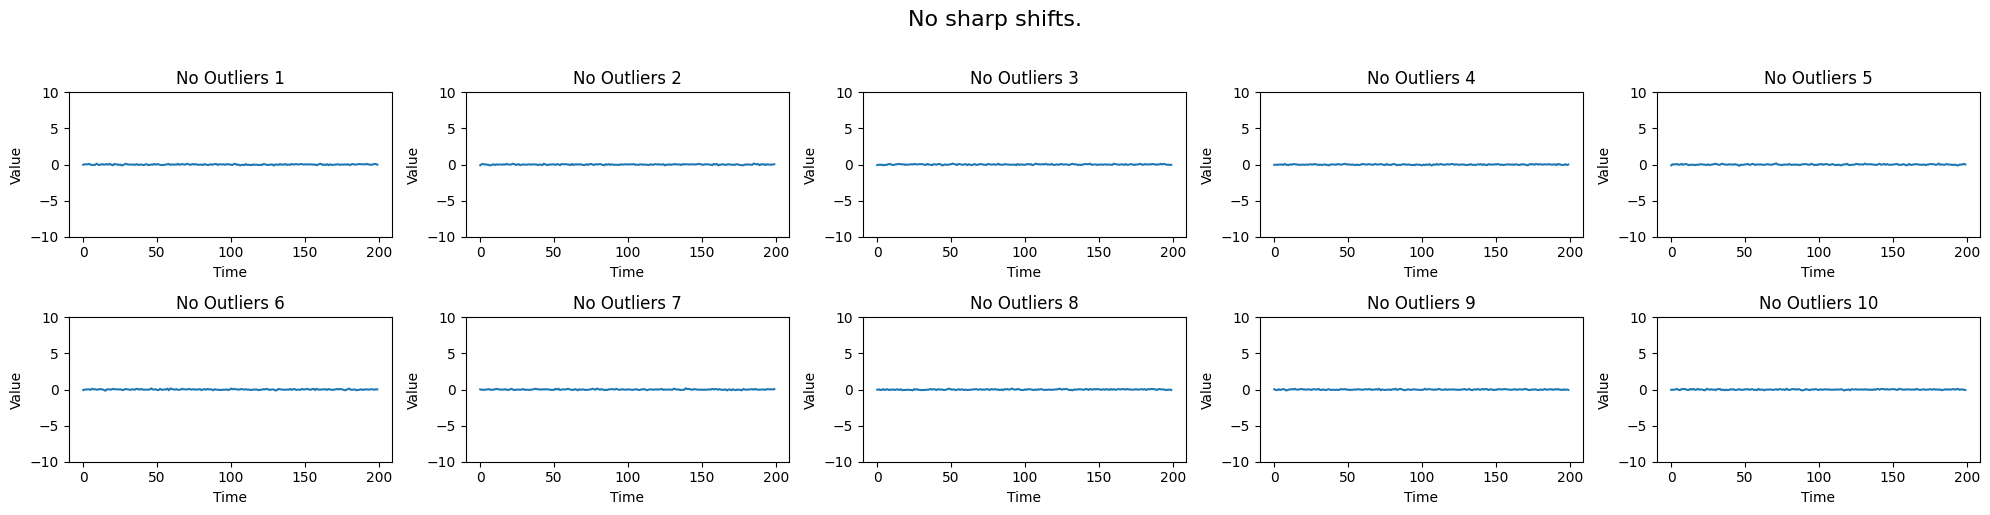

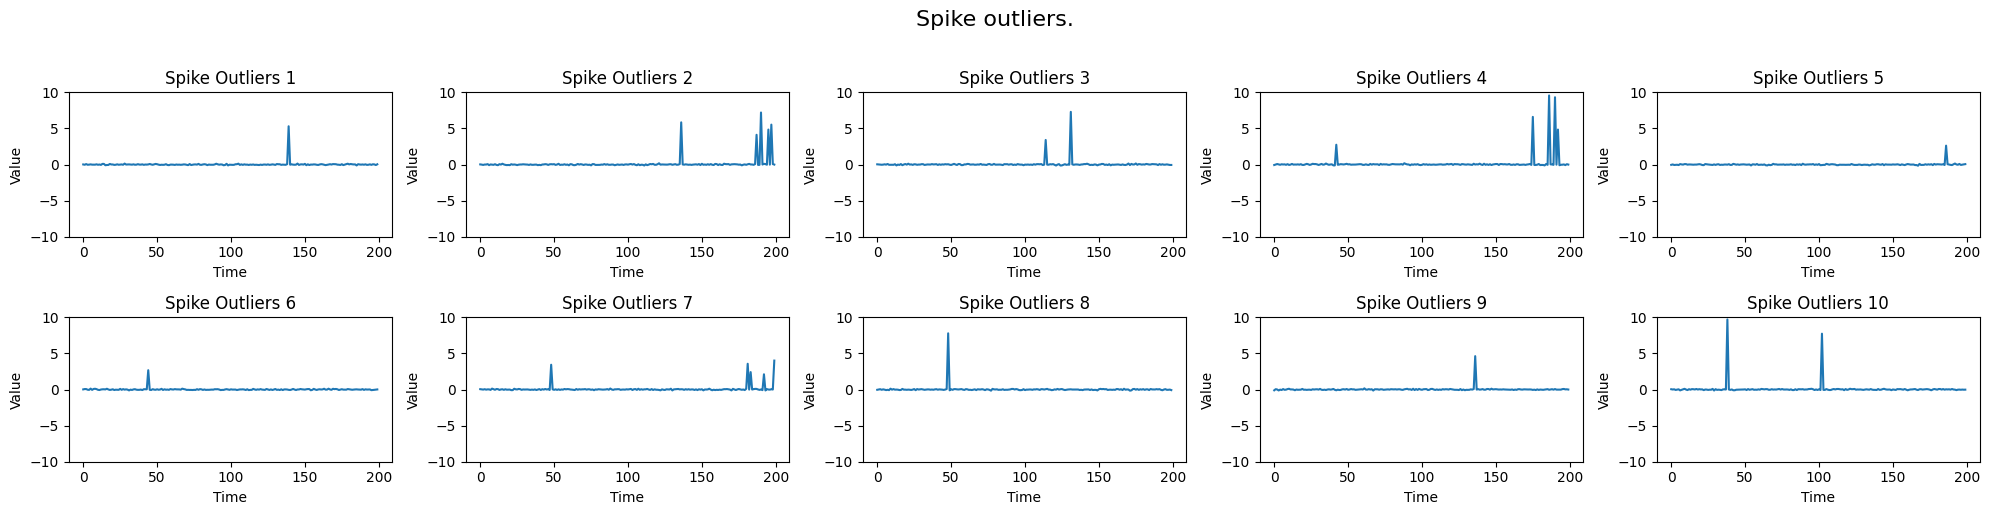

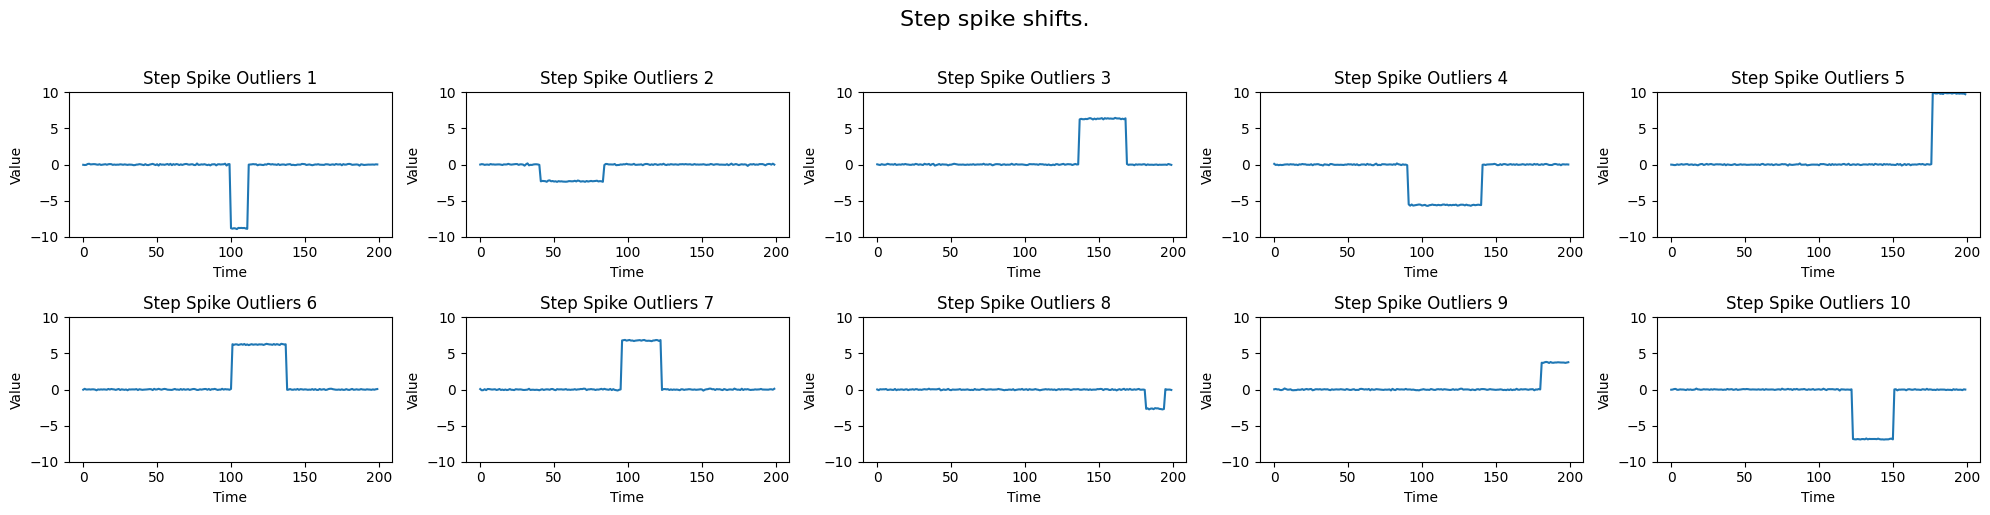

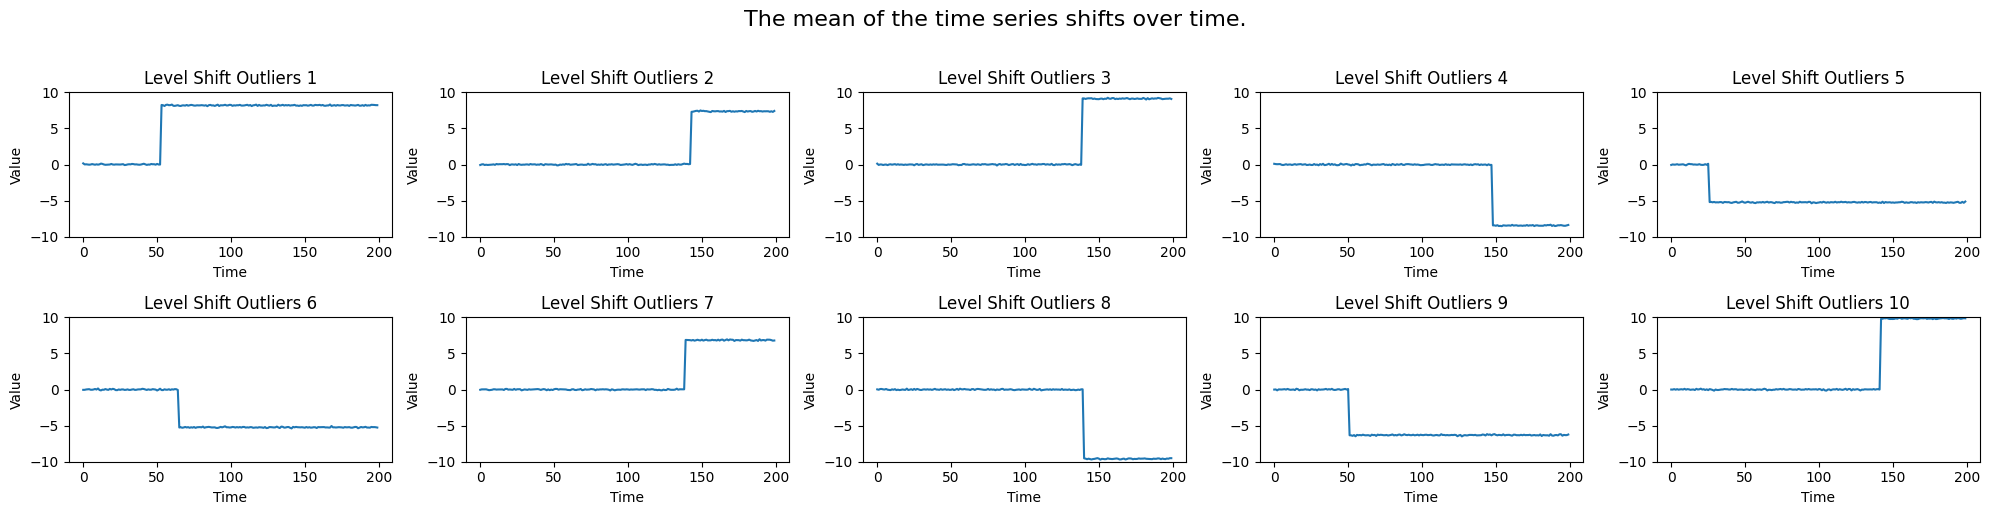

In [3]:
from outlier import *
import matplotlib.pyplot as plt

# Generate example series for each outlier type
n_series = 10  # Reduced number of series for better visualization
length = 200

# No outliers
no_series, no_descriptions = generate_outlier_series(
    n_series, length, 'no')

# Spike outliers
spike_series, spike_descriptions = generate_outlier_series(
    n_series, length, 'spikes')

# Step spike outliers
step_series, step_descriptions = generate_outlier_series(
    n_series, length, 'step_spike')

# Level shift outliers
level_series, level_descriptions = generate_outlier_series(
    n_series, length, 'level_shift')

# Create four separate figures for better visualization
# Figure 1: No Outliers
plt.figure(figsize=(20, 5))
plt.suptitle(no_descriptions[0], fontsize=16, y=1.02)

# Plot no outlier patterns in a 2x5 grid
for i, (series, desc) in enumerate(zip(no_series, no_descriptions)):
    plt.subplot(2, 5, i+1)
    plt.plot(series)
    plt.title(f'No Outliers {i+1}')
    plt.xlabel('Time')
    plt.ylabel('Value')
    plt.ylim(-10, 10)
    plt.tight_layout()

plt.show()

# Figure 2: Spike Outliers
plt.figure(figsize=(20, 5))
plt.suptitle(spike_descriptions[0], fontsize=16, y=1.02)

# Plot spike outlier patterns in a 2x5 grid
for i, (series, desc) in enumerate(zip(spike_series, spike_descriptions)):
    plt.subplot(2, 5, i+1)
    plt.plot(series)
    plt.title(f'Spike Outliers {i+1}')
    plt.xlabel('Time')
    plt.ylabel('Value')
    plt.ylim(-10, 10)
    plt.tight_layout()

plt.show()

# Figure 3: Step Spike Outliers
plt.figure(figsize=(20, 5))
plt.suptitle(step_descriptions[0], fontsize=16, y=1.02)

# Plot step spike outlier patterns in a 2x5 grid
for i, (series, desc) in enumerate(zip(step_series, step_descriptions)):
    plt.subplot(2, 5, i+1)
    plt.plot(series)
    plt.title(f'Step Spike Outliers {i+1}')
    plt.xlabel('Time')
    plt.ylabel('Value')
    plt.ylim(-10, 10)
    plt.tight_layout()

plt.show()

# Figure 4: Level Shift Outliers
plt.figure(figsize=(20, 5))
plt.suptitle(level_descriptions[0], fontsize=16, y=1.02)

# Plot level shift outlier patterns in a 2x5 grid
for i, (series, desc) in enumerate(zip(level_series, level_descriptions)):
    plt.subplot(2, 5, i+1)
    plt.plot(series)
    plt.title(f'Level Shift Outliers {i+1}')
    plt.xlabel('Time')
    plt.ylabel('Value')
    plt.ylim(-10, 10)
    plt.tight_layout()

plt.show()

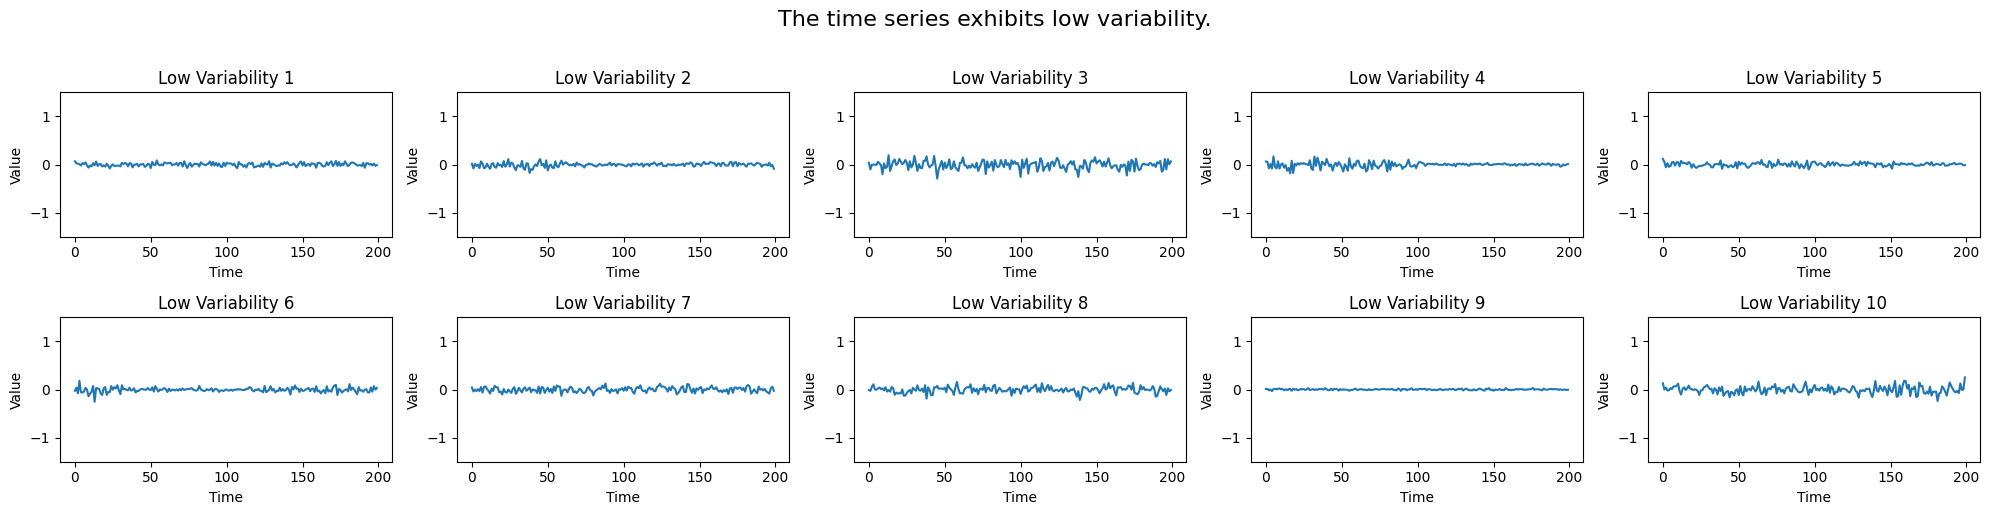

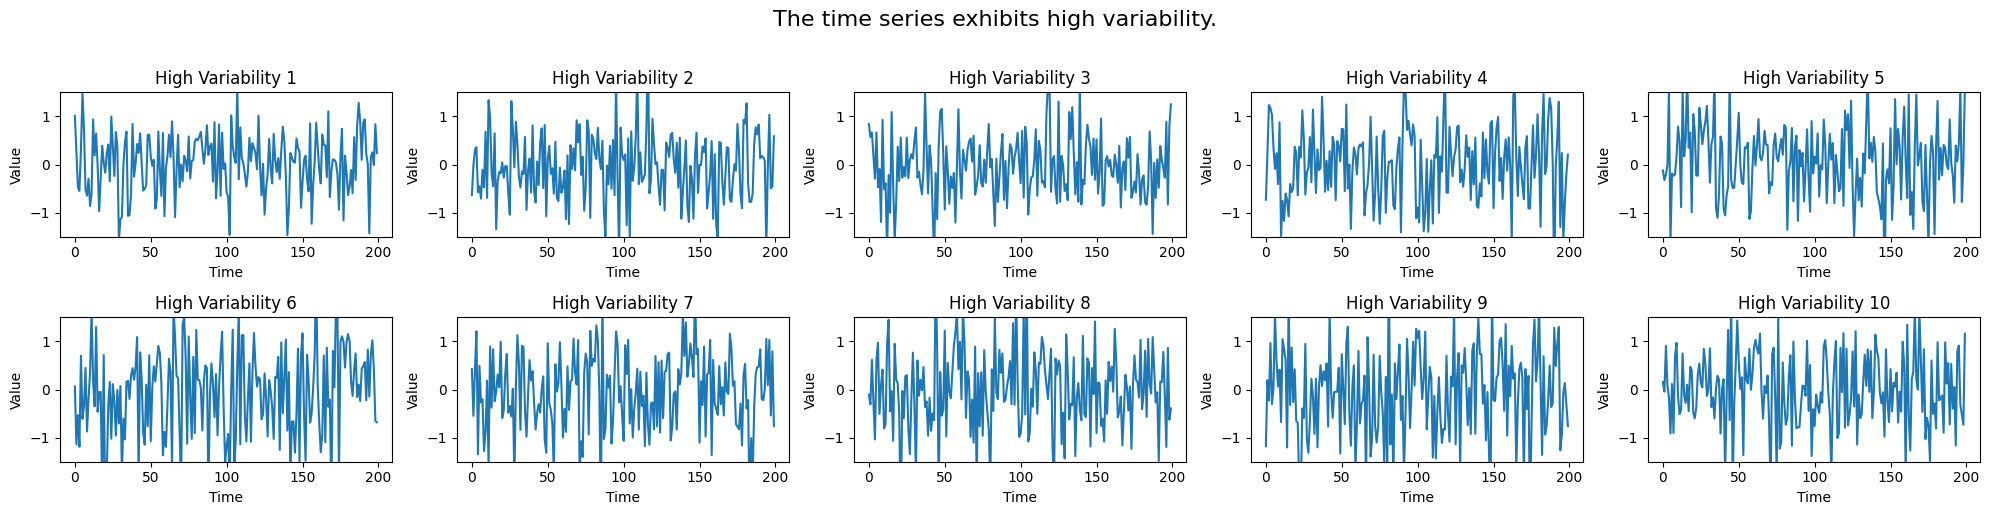

In [4]:
from variability import *

# Generate example series for each variability type
n_series = 10  # Number of series for visualization
length = 200

# Low variability
low_var_series, low_var_descriptions = generate_noise_series(
    n_series, length, 'low variability')

# High variability
high_var_series, high_var_descriptions = generate_noise_series(
    n_series, length, 'high variability')

# Create two separate figures for better visualization
# Figure 1: Low Variability
plt.figure(figsize=(20, 5))
plt.suptitle(low_var_descriptions[0], fontsize=16, y=1.02)

# Plot low variability patterns in a 2x5 grid
for i, (series, desc) in enumerate(zip(low_var_series, low_var_descriptions)):
    plt.subplot(2, 5, i+1)
    plt.plot(series)
    plt.title(f'Low Variability {i+1}')
    plt.xlabel('Time')
    plt.ylabel('Value')
    plt.ylim(-1.5, 1.5)  # Adjusted y-axis limits for better visualization
    plt.tight_layout()

plt.show()

# Figure 2: High Variability
plt.figure(figsize=(20, 5))
plt.suptitle(high_var_descriptions[0], fontsize=16, y=1.02)

# Plot high variability patterns in a 2x5 grid
for i, (series, desc) in enumerate(zip(high_var_series, high_var_descriptions)):
    plt.subplot(2, 5, i+1)
    plt.plot(series)
    plt.title(f'High Variability {i+1}')
    plt.xlabel('Time')
    plt.ylabel('Value')
    plt.ylim(-1.5, 1.5)  # Adjusted y-axis limits for better visualization
    plt.tight_layout()

plt.show()

In [5]:
import pandas as pd
from outlier import generate_outlier_series
from seasonality import generate_seasonal_series
from trend import generate_trend_series
from variability import generate_noise_series

# Parameters
n_samples = 10000
length = 200

# Initialize lists to store all data
all_series = []
all_descriptions = []
all_types = []

# Generate trend samples
trend_types = ['linear', 'quadratic', 'flat']
directions = ['up', 'down']
for trend_type in trend_types:
    if trend_type == 'flat':
        # Flat trends don't have direction
        series_list, description_list = generate_trend_series(
            n_samples, length, trend_type='flat')
        all_series.extend(series_list)
        all_descriptions.extend(description_list)
        all_types.extend(['trend_flat'] * n_samples)
    else:
        # Linear and quadratic trends have directions
        for direction in directions:
            series_list, description_list = generate_trend_series(
                n_samples, length, trend_type, direction)
            all_series.extend(series_list)
            all_descriptions.extend(description_list)
            all_types.extend([f'trend_{trend_type}_{direction}'] * n_samples)


# Generate seasonal samples
seasonal_types = ['no', 'single', 'multiple']
for seasonal_type in seasonal_types:
    series_list, description_list = generate_seasonal_series(
        n_samples, length, seasonal_type)
    all_series.extend(series_list)
    all_descriptions.extend(description_list)
    all_types.extend([f'seasonal_{seasonal_type}'] * n_samples)

# Generate outlier samples
outlier_types = ['no', 'spikes', 'step_spike', 'level_shift']
for outlier_type in outlier_types:
    series_list, description_list = generate_outlier_series(
        n_samples, length, outlier_type)
    all_series.extend(series_list)
    all_descriptions.extend(description_list)
    all_types.extend([f'outlier_{outlier_type}'] * n_samples)

# Generate noise samples
variability_types = ['low variability', 'high variability']
for variability_type in variability_types:
    series_list, description_list = generate_noise_series(
        n_samples, length, variability_type)
    all_series.extend(series_list)
    all_descriptions.extend(description_list)
    all_types.extend([f'variability_{variability_type}'] * n_samples)

# Convert to DataFrame
df = pd.DataFrame(all_series, columns=[str(i) for i in range(1, length+1)])
df['ts_description'] = all_descriptions
df['pattern_type'] = all_types

# Display summary
print(f"Generated {len(df)} samples")
print("\nPattern type counts:")
print(df['pattern_type'].value_counts())
print("\nFirst few rows:")
print(df.head())

# add a id column
df['id'] = range(1, len(df) + 1)
# Save to CSV
df.to_csv('../../data/synthetic/data.csv', index=False)

/var/folders/mx/85c6dr0j71n_d2rrwcc36l3m0000gn/T/ipykernel_57940/813334558.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


Generated 140000 samples

Pattern type counts:
pattern_type
trend_linear_up                 10000
trend_linear_down               10000
trend_quadratic_up              10000
trend_quadratic_down            10000
trend_flat                      10000
seasonal_no                     10000
seasonal_single                 10000
seasonal_multiple               10000
outlier_no                      10000
outlier_spikes                  10000
outlier_step_spike              10000
outlier_level_shift             10000
variability_low variability     10000
variability_high variability    10000
Name: count, dtype: int64

First few rows:
           1          2          3          4          5          6  \
0  -5.181023  -5.142176  -5.103328  -5.064480  -5.025632  -4.986784   
1   0.089764   0.127221   0.164679   0.202137   0.239595   0.277052   
2 -14.804843 -14.657236 -14.509630 -14.362023 -14.214417 -14.066811   
3  -8.652576  -8.524686  -8.396797  -8.268907  -8.141018  -8.013128   
4 -13.4777

In [6]:
df[df['pattern_type'] == 'trend_flat']


,1,2,3,4,5,6,7,8,9,10,...,194,195,196,197,198,199,200,ts_description,pattern_type,id
40000,-3.965448,-3.965448,-3.965448,-3.965448,-3.965448,-3.965448,-3.965448,-3.965448,-3.965448,-3.965448,...,-3.965448,-3.965448,-3.965448,-3.965448,-3.965448,-3.965448,-3.965448,No trend.,trend_flat,40001
40001,2.316440,2.316440,2.316440,2.316440,2.316440,2.316440,2.316440,2.316440,2.316440,2.316440,...,2.316440,2.316440,2.316440,2.316440,2.316440,2.316440,2.316440,No trend.,trend_flat,40002
40002,-0.155682,-0.155682,-0.155682,-0.155682,-0.155682,-0.155682,-0.155682,-0.155682,-0.155682,-0.155682,...,-0.155682,-0.155682,-0.155682,-0.155682,-0.155682,-0.155682,-0.155682,No trend.,trend_flat,40003
40003,3.795010,3.795010,3.795010,3.795010,3.795010,3.795010,3.795010,3.795010,3.795010,3.795010,...,3.795010,3.795010,3.795010,3.795010,3.795010,3.795010,3.795010,No trend.,trend_flat,40004
40004,0.024484,0.024484,0.024484,0.024484,0.024484,0.024484,0.024484,0.024484,0.024484,0.024484,...,0.024484,0.024484,0.024484,0.024484,0.024484,0.024484,0.024484,No trend.,trend_flat,40005
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,4.927033,4.927033,4.927033,4.927033,4.927033,4.927033,4.927033,4.927033,4.927033,4.927033,...,4.927033,4.927033,4.927033,4.927033,4.927033,4.927033,4.927033,No trend.,trend_flat,49996
49996,-0.644263,-0.644263,-0.644263,-0.644263,-0.644263,-0.644263,-0.644263,-0.644263,-0.644263,-0.644263,...,-0.644263,-0.644263,-0.644263,-0.644263,-0.644263,-0.644263,-0.644263,No trend.,trend_flat,49997
49997,-4.772911,-4.772911,-4.772911,-4.772911,-4.772911,-4.772911,-4.772911,-4.772911,-4.772911,-4.772911,...,-4.772911,-4.772911,-4.772911,-4.772911,-4.772911,-4.772911,-4.772911,No trend.,trend_flat,49998
49998,0.259727,0.259727,0.259727,0.259727,0.259727,0.259727,0.259727,0.259727,0.259727,0.259727,...,0.259727,0.259727,0.259727,0.259727,0.259727,0.259727,0.259727,No trend.,trend_flat,49999
